# Model Training and Selection

In this section, we will develop our models and perform model selection. The models we chose for this project are:

- Naive base (base model)
- Logistic Regression (gave best resutls)
- Knn
- SVM

In [23]:
#imports
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from prettytable import PrettyTable
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
import seaborn as sns
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit

### Lets first split the data

We split the data into 70% train and 30% t

In [56]:
#Create a function to split the data
DiabeticDataset = pd.read_csv('DiabeticDataset.csv')
DiabeticDataset = DiabeticDataset.drop(columns=['Unnamed: 0'])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)

# For each pair of train and test indices,
X = DiabeticDataset.drop('readmitted', axis=1)
y = DiabeticDataset.readmitted 
for trainIndexes, testIndexes in split.split(X, y):
    X_train, y_train = X.iloc[trainIndexes], y.iloc[trainIndexes]
    X_test, y_test = X.iloc[testIndexes], y.iloc[testIndexes]

#Print X and Y
print(y_train.value_counts())
print(y_test.value_counts())


0    49605
1     4927
Name: readmitted, dtype: int64
0    12402
1     1232
Name: readmitted, dtype: int64


In [57]:
DiabeticDataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,5,5,25,1,1,41,0,1,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,1,1,15,1,1,7,3,59,0,18,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,2,1,25,1,1,7,2,11,5,13,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,1,0,35,1,1,7,2,44,1,16,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,1,0,45,1,1,7,1,51,0,8,...,-20,0,-20,-20,-20,-20,-20,1,1,0


### Baseline Model Naive Bayes

We will start by building the initial model without balancing or tuning to see the results we get. This will be our baseline model and we will try to improve on it.

In [89]:
#naive bayes for unbalanced data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

nb=BernoulliNB()

# Perform training and prediction.
nb.fit(X_train, y_train)
nb1_pred = nb.predict(X_test)

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


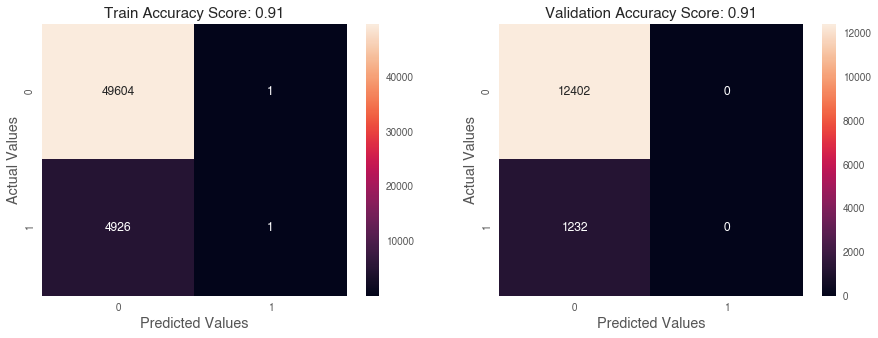

roc_auc_score for  LR Initial:  0.5951357015625883


In [90]:
#confusion matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, nbi_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, nbi_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, nbi_pred)))
predictions_nbi = nb.predict(X_train)
train_score = round(accuracy_score(y_train, predictions_nbi), 3)
cm_train = cm(y_train, predictions_nbi)

predictions_nb1 = nb.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_nb1), 3)
cm_val = cm(y_test, predictions_nb1)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = nb.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

We could see from the results above that the we are getting good accuracy overall, precision is low. However Recall which is the most important metric for our use case is very low. We will try to improve that by balancing the data.

### Balancing the data

We balanced the data using undersampling and oversampling. Under sampling gave us better results overall so we decided to go with it. 

In [61]:

#count results before sampling
print('Before Sampling {}'.format(Counter(y)))
sm = SMOTE(random_state=20)
X, y = sm.fit_resample(X_train, y_train)
print('After Sampling {}'.format(Counter(y)))

#Split the data again
for trainIndexes, testIndexes in split.split(X, y):
    X_train_sampled, y_train_sampled = X.iloc[trainIndexes], y.iloc[trainIndexes]
    
print(y_train_sampled.value_counts())


Before Sampling Counter({0: 15810, 1: 4750})
After Sampling Counter({0: 49605, 1: 49605})
1    39684
0    39684
Name: readmitted, dtype: int64


### Naive bayes with Balanced data

Now that we balanced the data, lets try Naive bayes with balanced data. 

In [88]:
nb=BernoulliNB()

# Perform training and prediction.
nb.fit(X_train_sampled, y_train_sampled)
nb_pred = nb.predict(X_test)

Accuracy is 0.55
Precision is 0.09
Recall is 0.42


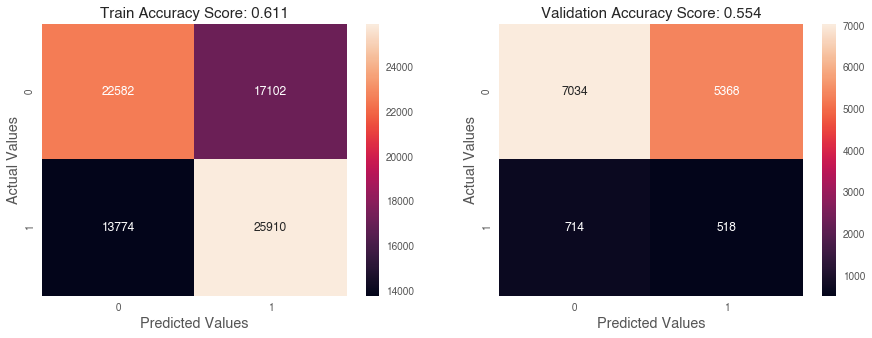

roc_auc_score for  LR Initial:  0.48481222655750955


In [70]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, nb_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, nb_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, nb_pred)))
predictions_nb = nb.predict(X_train_sampled)
train_score = round(accuracy_score(y_train_sampled, predictions_nb), 3)
cm_train = cm(y_train_sampled, predictions_nb)

predictions_nbt = nb.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_nbt), 3)
cm_val = cm(y_test, predictions_nbt)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = nb.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

We could see from the results abovr that recall went up from 0.00 to 0.41. Since this is a cancer like problem, recall is the most important metric for us because we want to be able to have high accuracy in prediction the TP. (readmitted in <30) so we choose this one as our best NB model

### Logistic Regression

Lets start with a base logistic regression model.

0.90919759424967
[[12394     8]
 [ 1230     2]]
Accuracy is 0.91
Precision is 0.20
Recall is 0.00


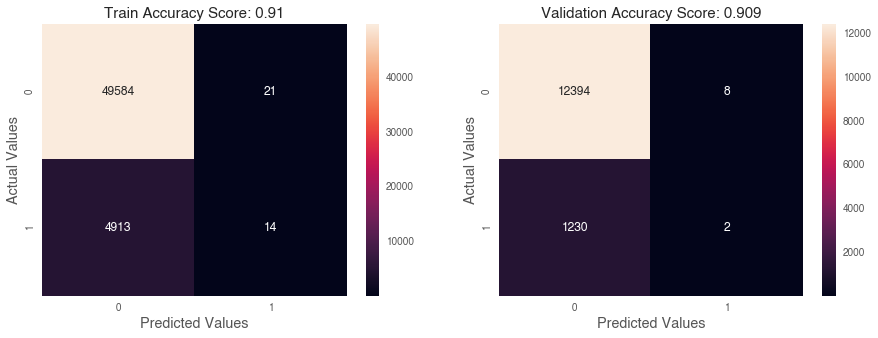

roc_auc_score for  LR Initial:  0.6302023448249863


In [72]:
# Instanciate an object from Logistic Regression class.
lr = LogisticRegression()

# Perform training and prediction.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
      
# Return training accuracy and confusion matrix.
TrainAcc = accuracy_score(y_train, y_pred)
TrainConf = confusion_matrix(y_train, y_pred)
LR = lr

y_test_pred = LR.predict(X_test)
TestAcc = accuracy_score(y_test, y_test_pred)
TestConf = confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_test_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_test_pred)))

from sklearn.metrics import confusion_matrix as cm

predictions_lri = LR.predict(X_train)
train_score = round(accuracy_score(y_train, predictions_lri), 3)
cm_train = cm(y_train, predictions_lri)

predictions_lriT = LR.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_lriT), 3)
cm_val = cm(y_test, predictions_lriT)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = LR.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

We could see from above that we have 0 precision and recall and 89% accuracy. What the model is basically doing here is it's trying to get hight accuracy by predicting all patients as not readmitted within 30 days. Thay is why we have to focus on getting recall scores higher.

### Tuning our logistic regression model

Lets first run it on balanced data.
We will use a grid search to find the best parameters for our Logistic Regression model. 

In [31]:
lr = LogisticRegression()

#What to tune?
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10, 50)

hyperparameters = dict(C=C, penalty=penalty)

# Grid Search
lr = GridSearchCV(lr, hyperparameters, cv=10)
# Best Model
best = lr.fit(X_train_sampled, y_train_sampled)
print('Best Penalty:', best.best_estimator_.get_params()['penalty']) # l1

Best Penalty: l2


Now we got the best parameter, lets train our new model.

In [73]:
#start new logistic regression with tuned params
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(
                            cv=10 
                           , penalty='l2' #lasso
                           , max_iter=500
                           , random_state=7)

# Perform training and prediction.
lr.fit(X_train_sampled, y_train_sampled)
y_pred_lr = lr.predict(X_train_sampled)
      
# Return training accuracy and confusion matrix.
TrainAcc = accuracy_score(y_train_sampled, y_pred_lr)
TrainConf = confusion_matrix(y_train_sampled, y_pred_lr)
LR = lr

print(TrainAcc)
print(TrainConf)
print("Accuracy is {0:.2f}".format(accuracy_score(y_train_sampled, y_pred_lr)))
print("Precision is {0:.2f}".format(precision_score(y_train_sampled, y_pred_lr)))
print("Recall is {0:.2f}".format(recall_score(y_train_sampled, y_pred_lr)))

0.6534119544400766
[[24985 14699]
 [12809 26875]]
Accuracy is 0.65
Precision is 0.65
Recall is 0.68


0.6020243508874872
[[7565 4837]
 [ 589  643]]
Accuracy is 0.60
Precision is 0.12
Recall is 0.52


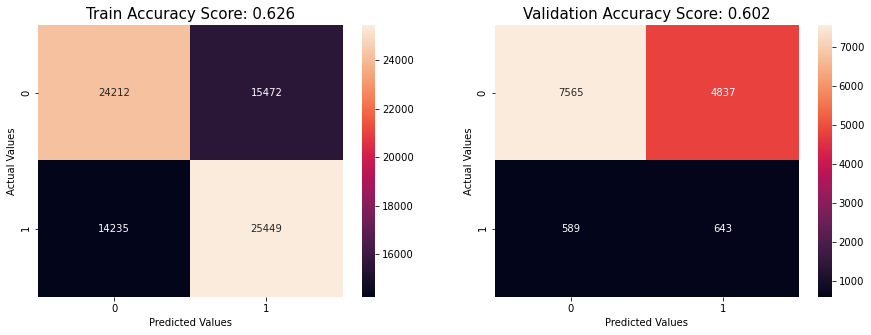

roc_auc_score for  LR Initial:  0.5888408630153914


In [33]:
y_test_pred_lr = LR.predict(X_test)
TestAcc = accuracy_score(y_test, y_test_pred_lr)
TestConf = confusion_matrix(y_test, y_test_pred_lr)
print(TestAcc)
print(TestConf)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_test_pred_lr)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_test_pred_lr)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_test_pred_lr)))
predictions_lrb = LR.predict(X_train_sampled)
train_score = round(accuracy_score(y_train_sampled, predictions_lrb), 3)
cm_train = cm(y_train_sampled, predictions_lrb)

predictions_lrbT = LR.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_lrbT), 3)
cm_val = cm(y_test, predictions_lrbT)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = LR.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

We could see that our model improved a lot. Specially with Recall. This is our best performing model so far as it highest the highest recall and AUC scores.

### KNN Classifier

First we are going to try a baseline mode with KNN with K = 3

accuracy: 0.8899809300278715
Precision is 0.10
Recall is 0.03


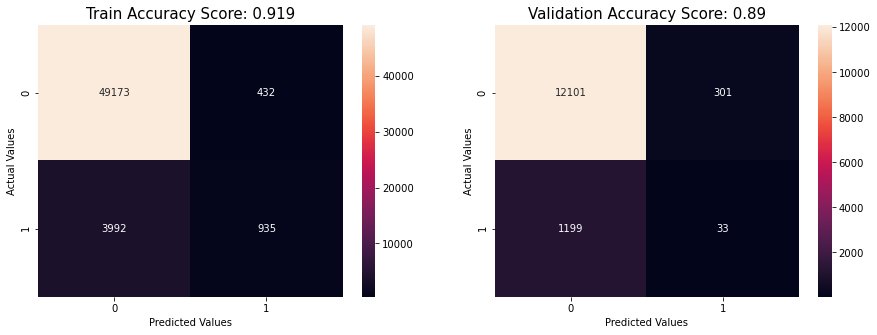

roc_auc_score for  LR Initial:  0.5075609990114708


In [34]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, pred)))

from sklearn.metrics import confusion_matrix as cm

predictions_knni = knn.predict(X_train)
train_score = round(accuracy_score(y_train, predictions_knni), 3)
cm_train = cm(y_train, predictions_knni)

predictions_knnit = knn.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_knnit), 3)
cm_val = cm(y_test, predictions_knnit)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = knn.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

Again, we are getting very low precision and recall. lets try to fix it.
Now lets try to tune our model and find the best k. We will use 10-f0ld cross validation and grid search to find the best k. we will also run it on the balanced dataset. 

In [35]:
#performing a 10-fold cross validation on our dataset using a generated list of odd K’s ranging from 1 to 50.
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_sampled, y_train_sampled, cv=10, scoring='roc_auc')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5


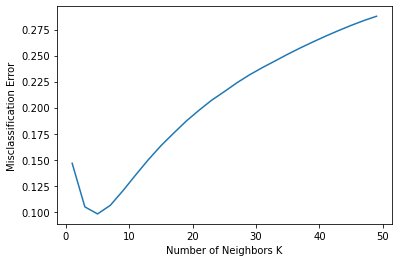

In [36]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

The results are giving us the best k as K= . Now lets run our new model with weights = 'uniform.

0.58046061317295
[[7363 5039]
 [ 681  551]]
Accuracy is 0.58
Precision is 0.10
Recall is 0.45


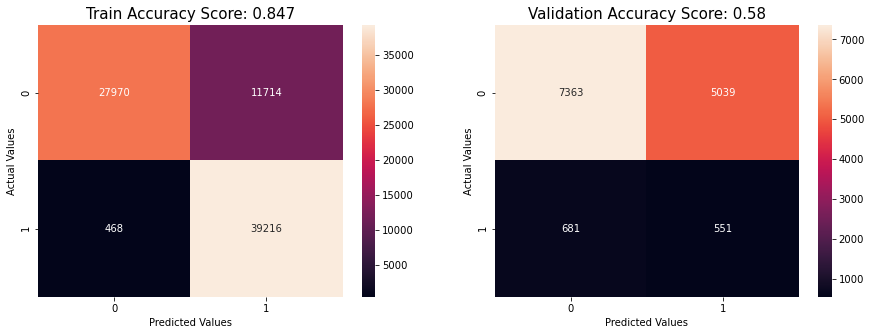

roc_auc_score for  LR Initial:  0.5300508584706698


In [37]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform') #weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. 

# fitting the model
knn.fit(X_train_sampled, y_train_sampled)

# predict the response
pred_knn = knn.predict(X_test)

TestAcc = accuracy_score(y_test, pred_knn)
TestConf = confusion_matrix(y_test, pred_knn)
print(TestAcc)
print(TestConf)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, pred_knn)))
print("Precision is {0:.2f}".format(precision_score(y_test, pred_knn)))
print("Recall is {0:.2f}".format(recall_score(y_test, pred_knn)))

from sklearn.metrics import confusion_matrix as cm

predictions_knnb = knn.predict(X_train_sampled)
train_score = round(accuracy_score(y_train_sampled, predictions_knnb), 3)
cm_train = cm(y_train_sampled, predictions_knnb)

predictions_knnbt = knn.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_knnbt), 3)
cm_val = cm(y_test, predictions_knnbt)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = knn.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

we see recall improved a little bit but not as much as we need it to and it is still not performing better than the Logistic regression model. Now we will try with weights = 'distance'

accuracy: 0.58390787736541
Accuracy is 0.58
Precision is 0.10
Recall is 0.45


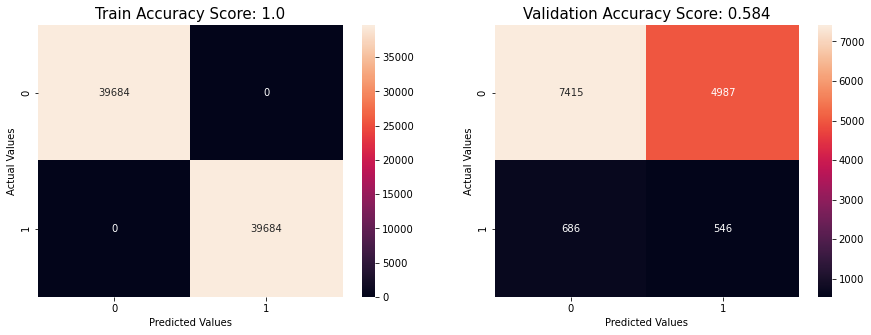

roc_auc_score for  LR Initial:  0.5294716420895667


In [38]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance') #weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. 

# fitting the model
knn.fit(X_train_sampled, y_train_sampled)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, pred_knn)))
print("Precision is {0:.2f}".format(precision_score(y_test, pred_knn)))
print("Recall is {0:.2f}".format(recall_score(y_test, pred_knn)))

from sklearn.metrics import confusion_matrix as cm

predictions_knnb1 = knn.predict(X_train_sampled)
train_score = round(accuracy_score(y_train_sampled, predictions_knnb1), 3)
cm_train = cm(y_train_sampled, predictions_knnb1)

predictions_knnbt1 = knn.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_knnbt1), 3)
cm_val = cm(y_test, predictions_knnbt1)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
y_score = knn.predict_proba(X_test)[:,1]
print('roc_auc_score for  LR Initial: ', roc_auc_score(y_test, y_score))

# SVM

Confusion Matrix - Train
[[12313    89]
 [ 1215    17]]
Test
Accuracy: 0.9043567551708963
Precision: 0.16037735849056603
Recall: 0.013798701298701298


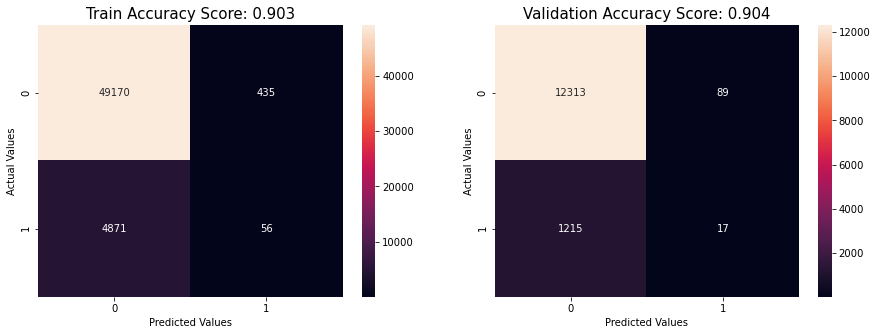

AUC- 50.33


In [40]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svc = svm.LinearSVC() # use LinearSVC for faster computation
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
print("Confusion Matrix - Train")
print(confusion_matrix( y_test,y_pred_test))

print("Test")
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_test))
print("Precision:",metrics.precision_score(y_test,y_pred_test))
print("Recall:",metrics.recall_score(y_test,y_pred_test))

predictions_svm = svc.predict(X_train)
train_score = round(accuracy_score(y_train, predictions_svm), 3)
cm_train = cm(y_train, predictions_svm)

predictions_svmi = svc.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_svmi), 3)
cm_val = cm(y_test, predictions_svmi)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
print(f"AUC- {metrics.roc_auc_score(y_test, predictions_svmi) *100:.2f}")

### Tuned SVM

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10,], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.01, gamma=1)


Test
Accuracy: 0.5704122047821623
Precision: 0.10449803317940824
Recall: 0.49594155844155846


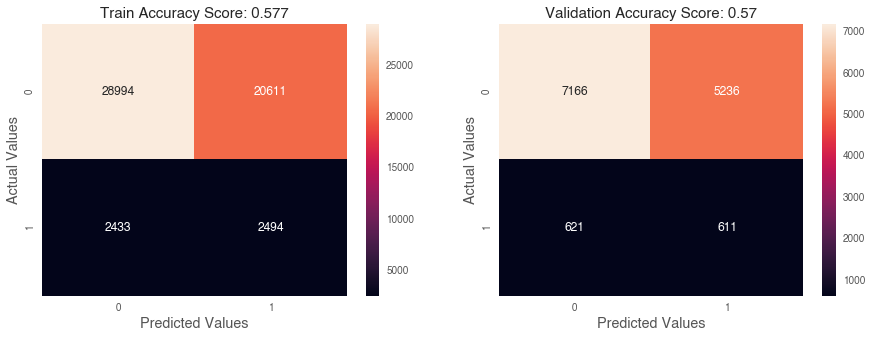

AUC- 53.69


In [62]:
svc = svm.SVC() 
svc.fit(X_train_sampled, y_train_sampled)
y_pred_test = svc.predict(X_test)

print("Test")
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_test))
print("Precision:",metrics.precision_score(y_test,y_pred_test))
print("Recall:",metrics.recall_score(y_test,y_pred_test))

predictions_svm = svc.predict(X_train)
train_score = round(accuracy_score(y_train, predictions_svm), 3)
cm_train = cm(y_train, predictions_svm)

predictions_svmb = svc.predict(X_test)
val_score = round(accuracy_score(y_test, predictions_svmb), 3)
cm_val = cm(y_test, predictions_svmb)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()
print(f"AUC- {metrics.roc_auc_score(y_test, predictions_svmb) *100:.2f}")

## Model Selection and Comparisons

### Initial Baseline Models Before Tuning

Our baseline models before tuning all have very low AUC at 0.50 and almost 0 precision and 0 recall for all. This is because of the highly inbalanced data. Our model is basically predicting all patient as will not be readmitted within 30 days in order to get high accuracy. This could be misleadin as in a problem like ours, The Nost of FN is much higher than the cost of FP. We tried to improve recall while maintain good accuracuy and precision. 

### ROC Curves Initial

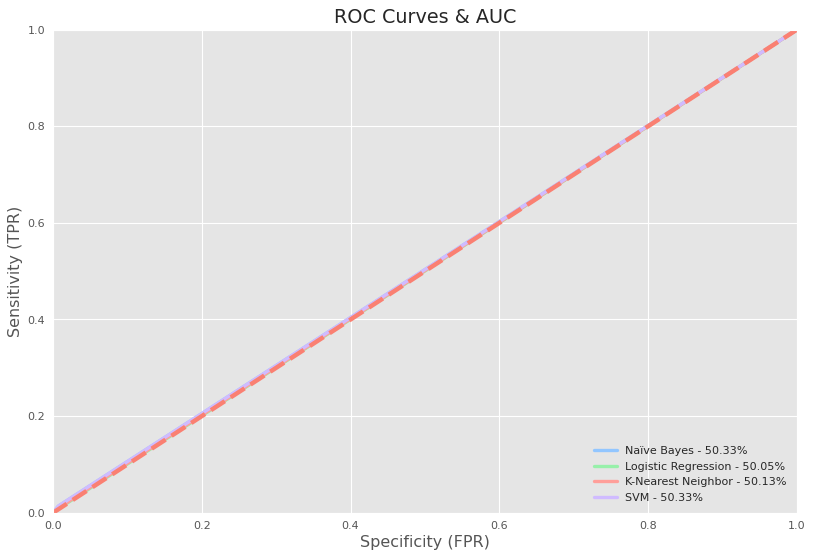

In [97]:
plt.style.use('ggplot') 
plt.style.use('seaborn-pastel')
hfont = {'fontname':'DejaVu Sans'}
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)

models = {'Naïve Bayes':pred
, 'Logistic Regression':predictions_lriT
, 'K-Nearest Neighbor':predictions_knnit,
'SVM': predictions_svmi
}

# Below for loop iterates through your models list
for m, pred in models.items():

    # Compute FPR, TPR & AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)

    # Plot Metrics
    plt.plot(fpr, tpr, label=f'{m} - {auc*100:.2f}%', linewidth=3)

# Plot Settings
plt.plot([0, 1], [0, 1], color='salmon', linewidth=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves & AUC')
plt.legend(loc="lower right", facecolor='white')
plt.show()

All initial models performing at 0.50 accuracy.

### PR Curves Initial

<Figure size 960x640 with 0 Axes>

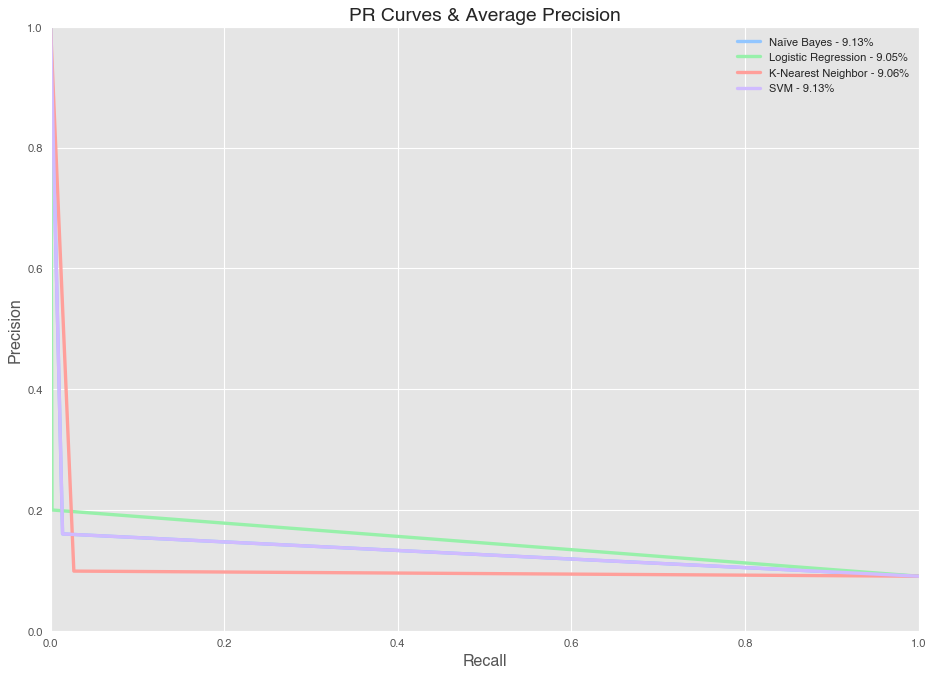

In [98]:
plt.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)
plt.figure(figsize=(14, 10), dpi=80)

# Below for loop iterates through your models list
for m, pred in models.items():

    # Calculate PR for Curves
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ap = average_precision_score(y_test, pred)
    
    # Plot Metrics
    plt.plot(recall, precision, label=f'{m} - {ap*100:.2f}%', linewidth=3)

# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves & Average Precision')
plt.legend(loc="best", facecolor='white')
plt.show()


Precision and Recall are very low. Which means our model is not performing well.

### Model results after tuning and balancing the data

After tuning our models, we see some improvement in recall and precision scores. Specially after balancing the data. However this takes down the overall accuracy. In our problem setting, recall is most important so we are focusing on recall and AUC metric. we could see improvement from the graphs below, specially for Logisitic regression and Knn.

### ROC Curve Comparison (After Tuning)

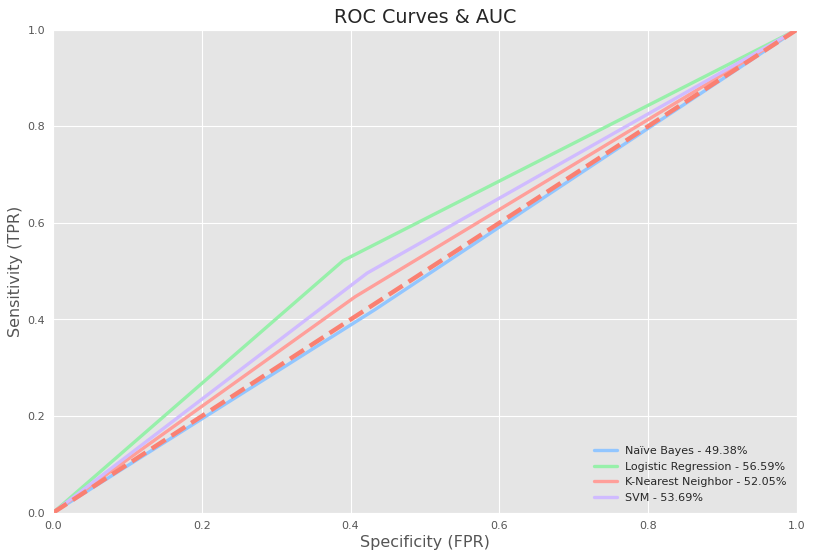

In [82]:
plt.style.use('ggplot') 
plt.style.use('seaborn-pastel')
hfont = {'fontname':'DejaVu Sans'}
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)

models = {'Naïve Bayes': nb_pred
, 'Logistic Regression':y_test_pred_lr
, 'K-Nearest Neighbor':pred_knn,
          'SVM': predictions_svmb
}

# Below for loop iterates through your models list
for m, pred in models.items():

    # Compute FPR, TPR & AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)

    # Plot Metrics
    plt.plot(fpr, tpr, label=f'{m} - {auc*100:.2f}%', linewidth=3)


# Plot Settings
plt.plot([0, 1], [0, 1], color='salmon', linewidth=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves & AUC')
plt.legend(loc="lower right", facecolor='white')
plt.show()

We see improvement on AUC for both Logistic regression and Knn. Logistic regression has the best performance.

### PR Curves (After Tuning)

<Figure size 960x640 with 0 Axes>

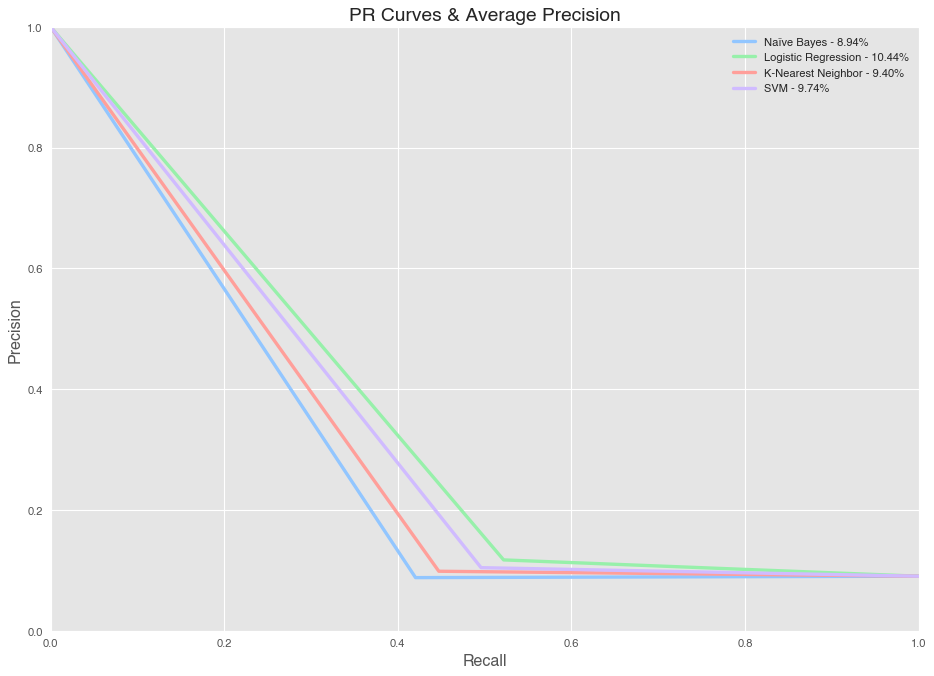

In [83]:
plt.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)
plt.figure(figsize=(14, 10), dpi=80)

# Below for loop iterates through your models list
for m, pred in models.items():

    # Calculate PR for Curves
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ap = average_precision_score(y_test, pred)
    
    # Plot Metrics
    plt.plot(recall, precision, label=f'{m} - {ap*100:.2f}%', linewidth=3)

# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) #scaled to zoom in on curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves & Average Precision')
plt.legend(loc="best", facecolor='white')
plt.show()


We see improvements on the PR curves for Naive Bayes, Logistic Regression and Knn. SVM did not improve as much. Logistic regression is still performin the best. 

##Feature importances

In [50]:
pip install yellowbrick

     |████████████████████████████████| 271 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


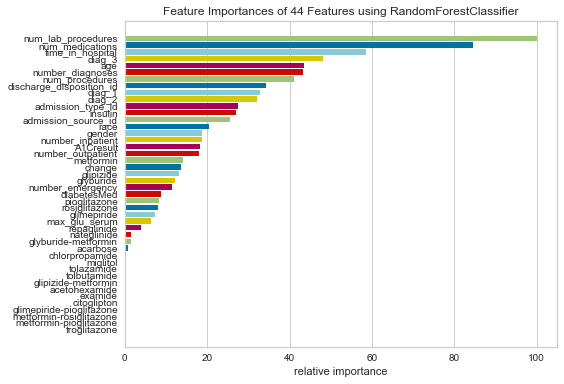

<AxesSubplot:title={'center':'Feature Importances of 44 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [58]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X, y = load_occupancy()

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

Feature: 0, Score: -0.00001
Feature: 1, Score: -0.00600
Feature: 2, Score: -0.00739
Feature: 3, Score: 0.01988
Feature: 4, Score: -0.01066
Feature: 5, Score: 0.02217
Feature: 6, Score: -0.00766
Feature: 7, Score: -0.00190
Feature: 8, Score: 0.00171
Feature: 9, Score: -0.01167
Feature: 10, Score: 0.00524
Feature: 11, Score: -0.00236
Feature: 12, Score: -0.00086
Feature: 13, Score: 0.00122
Feature: 14, Score: -0.01058
Feature: 15, Score: -0.01058
Feature: 16, Score: -0.01192
Feature: 17, Score: -0.00028
Feature: 18, Score: -0.00334
Feature: 19, Score: -0.00796
Feature: 20, Score: -0.00615
Feature: 21, Score: 0.00575
Feature: 22, Score: 0.00281
Feature: 23, Score: 0.00240
Feature: 24, Score: 0.00148
Feature: 25, Score: 0.00280
Feature: 26, Score: 0.00374
Feature: 27, Score: 0.00067
Feature: 28, Score: 0.00270
Feature: 29, Score: 0.00078
Feature: 30, Score: -0.00059
Feature: 31, Score: 0.00217
Feature: 32, Score: 0.00267
Feature: 33, Score: 0.00277
Feature: 34, Score: 0.00260
Feature: 35, 

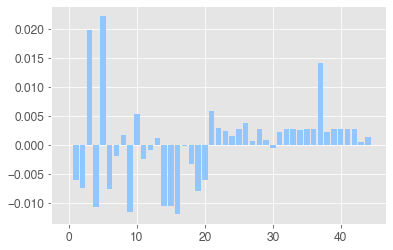

In [49]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

model = LogisticRegression()
# fit the model
model.fit(X_train_sampled, y_train_sampled)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Conclusion 

After running all our model, balancing the data and tuning them. We conclude that the tuned logistic regression model is giving us the best results based on its AUC and PR curves.
Accuracy is 0.59
Precision is 0.15
Recall is 0.53

One interesting finding is that SVM results did not change with balanced and unbalanced data. We concluded this was because balancing the data just recreates same rows from the data. This means that the Geometric margins will still be the same even after balancing the data.

Knn slightly improve but still had low recall at 0.22.

Naive base also improved a lot in terms of recall but still has low precision and low AUC.